# Who is going to survive

<img src='titanicimg.jpg'>

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('ttrain.csv')
df2=pd.read_csv('ttest.csv')

In [3]:
df1.shape,df2.shape

((891, 12), (418, 11))

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<img src='Titanic_voyage_map.png'>

In [5]:
ls 

 Volume in drive C is OS
 Volume Serial Number is 3EBF-0838

 Directory of C:\Users\abdul\Documents\MSAI\projects\project2-Titanic

28-05-2023  23:25    <DIR>          .
28-05-2023  23:25    <DIR>          ..
28-05-2023  20:35    <DIR>          .ipynb_checkpoints
28-05-2023  20:00             3,258 gender_submission.csv
28-05-2023  23:25           109,275 Titanic Survivel Prediction.ipynb
28-05-2023  20:07             7,827 Titanic_voyage_map.png
28-05-2023  20:43            37,614 titanicimg.jpg
28-05-2023  19:12            28,629 ttest.csv
28-05-2023  19:12            61,194 ttrain.csv
               6 File(s)        247,797 bytes
               3 Dir(s)  138,767,814,656 bytes free


In [6]:
df1.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df=df1.append(df2)

C:\Users\abdul\AppData\Local\Temp\ipykernel_4528\2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape

(1309, 12)

In [11]:
df.isnull().sum() # since there is missing values,we need tofill that using the below methods.for embarked we use the most repeated ones and fill it

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Feature Engineering

In [12]:
df['Fare'].mean()

33.29547928134557

In [13]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean()) # missing values are filled

In [14]:
import seaborn as sns

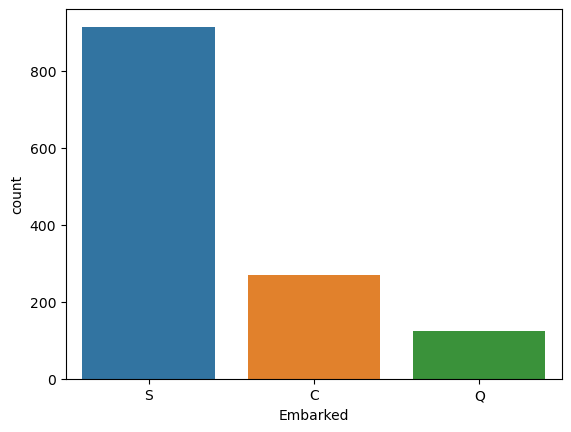

In [15]:
sns.countplot(x=df['Embarked']) ;
# to find the  mpost repeated ones.

In [16]:
df['Embarked']=df['Embarked'].fillna('S')

In [17]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [18]:
1014/1309 # very high percent is missing,so dlt that columns. or if it is more than 20%,deletre it


0.774637127578304

In [19]:
del df['Cabin']

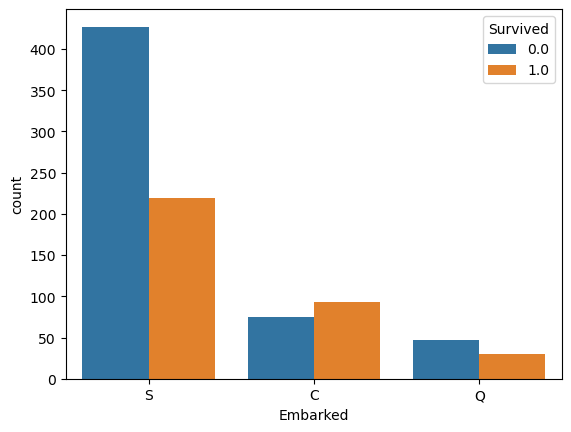

In [20]:
sns.countplot(x=df['Embarked'],hue=df['Survived']) ;

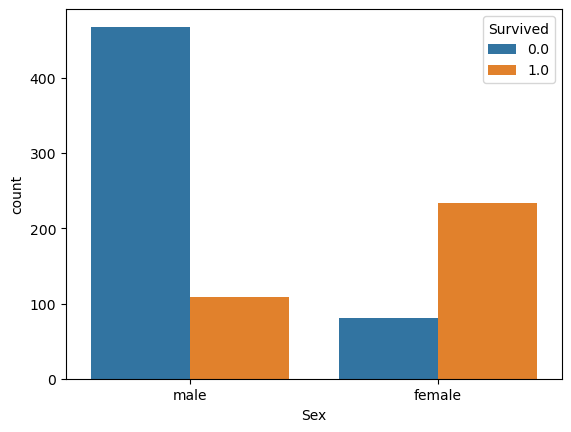

In [21]:
sns.countplot(x=df['Sex'],hue=df['Survived']) ;

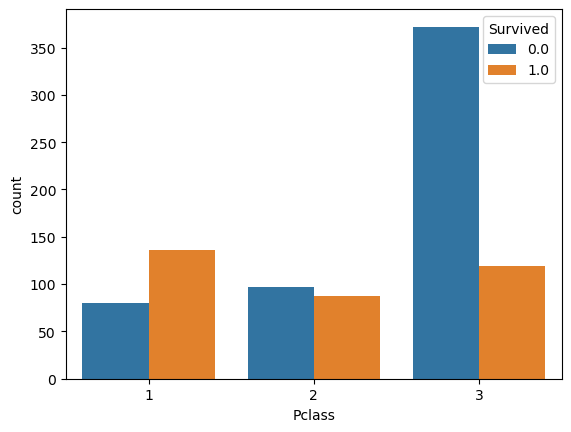

In [22]:
sns.countplot(x=df['Pclass'],hue=df['Survived']) ;

In [23]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
699,700,0.0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.00,0,0,348121,7.6500,S
577,578,1.0,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.00,1,0,13507,55.9000,S
434,435,0.0,1,"Silvey, Mr. William Baird",male,50.00,1,0,13507,55.9000,S
314,315,0.0,2,"Hart, Mr. Benjamin",male,43.00,1,1,F.C.C. 13529,26.2500,S
815,816,0.0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,S
818,819,0.0,3,"Holm, Mr. John Fredrik Alexander",male,43.00,0,0,C 7075,6.4500,S
637,638,0.0,2,"Collyer, Mr. Harvey",male,31.00,1,1,C.A. 31921,26.2500,S
0,892,NaN,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,Q
831,832,1.0,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
555,556,0.0,1,"Wright, Mr. George",male,62.00,0,0,113807,26.5500,S


In [24]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [25]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [26]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

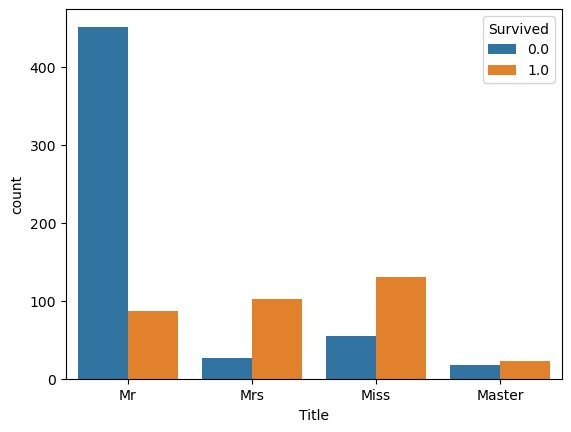

In [30]:
sns.countplot(x=df['Title'],hue=df['Survived']);

In [29]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Jonkheer','Don','Sir','Major','Dr','Capt','Col'],'Mr')

In [36]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [33]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [35]:
df.groupby('Title')['Age'].median()

Title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [37]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [38]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [39]:
df['Family']=1+df['Parch']+df['SibSp'] # creating column of family members

<Axes: xlabel='Family', ylabel='count'>

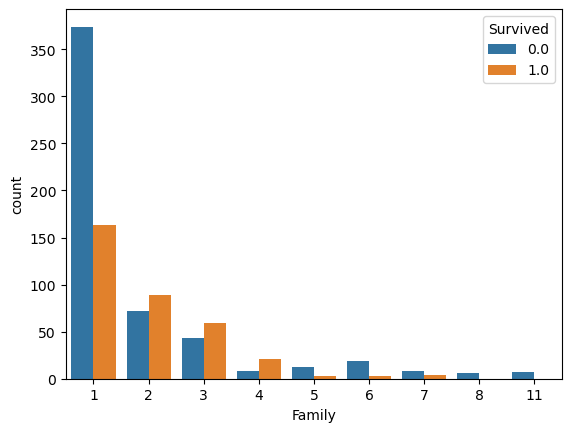

In [40]:
sns.countplot(x=df['Family'],hue=df['Survived'])

In [41]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [43]:
df.corr()

C:\Users\abdul\AppData\Local\Temp\ipykernel_4528\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,-0.338481,-0.075808,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.386723,0.060832,0.018322,-0.558477,0.050027
Age,-0.075808,-0.386723,1.000000,-0.216262,-0.132567,0.177429,-0.214705
SibSp,-0.035322,0.060832,-0.216262,1.000000,0.373587,0.160224,0.861952
Parch,0.081629,0.018322,-0.132567,0.373587,1.000000,0.221522,0.792296
Fare,0.257307,-0.558477,0.177429,0.160224,0.221522,1.000000,0.226465
Family,0.016639,0.050027,-0.214705,0.861952,0.792296,0.226465,1.000000


In [44]:
data=pd.get_dummies(df,drop_first=True) #creating numericalvalues for text values.

In [46]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [47]:
train=data[:891] #rows under 891
test=data[891:]#rows above 891

In [49]:
train.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
886,0.0,2,27.0,0,0,13.00,1,1,0,1,0,1,0
887,1.0,1,19.0,0,0,30.00,1,0,0,1,1,0,0
888,0.0,3,22.0,1,2,23.45,4,0,0,1,1,0,0
889,1.0,1,26.0,0,0,30.00,1,1,0,0,0,1,0
890,0.0,3,32.0,0,0,7.75,1,1,1,0,0,1,0


In [48]:
####models


# Probability-gauss,
# distance base
#Tree
# Ensemble

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
g=GaussianNB()

In [57]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [58]:
g.fit(x,y)

GaussianNB()

In [60]:
predg=g.predict(test.drop('Survived',axis=1))

In [64]:
predg

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [69]:
result=pd.DataFrame() #creating new dataframe

In [71]:
result['PassengerId']=df2['PassengerId']

In [72]:
result['Survived']=predg

In [79]:
result

,PassengerId,Survived
0,892,No
1,893,Yes
2,894,No
3,895,No
4,896,Yes
...,...,...
413,1305,No
414,1306,Yes
415,1307,No
416,1308,No


In [80]:
del result['Survived']

In [81]:
result

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [82]:
result['Survived']=predg

In [83]:
result

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [84]:
result['Survived']=result['Survived'].astype('int64')

In [85]:
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [86]:
result.to_csv('titanicpredicton.csv',index=False)